--- CLASSIFIER PERFORMANCE METRICS ---
Accuracy: 0.9699
Precision: 0.8259
Recall:    0.8450
F1-Score:  0.8353
AUC-ROC Score: 0.9705


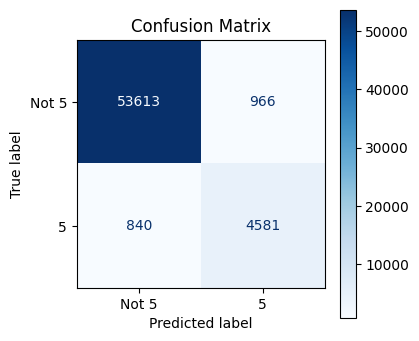

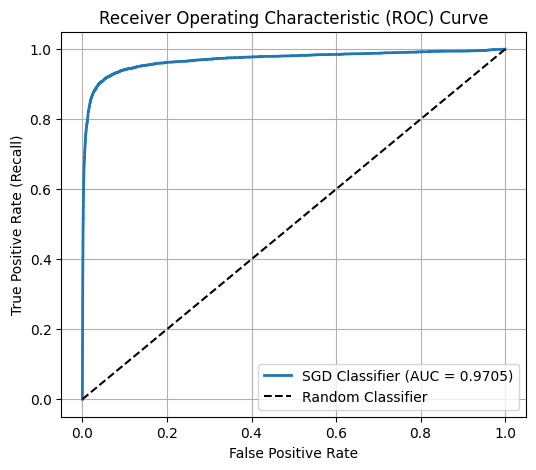

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)

np.random.seed(42)

# --- 1. Load and Prepare Data ---
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target

y = y.astype(np.uint8)
X_train = X[:60000]
y_train = y[:60000]

y_train_5 = (y_train == 5)

X_train_scaled = X_train / 255.0

# --- 2. Train Classifier ---
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train_5)

# --- 3. Evaluate Performance ---
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train_5, cv=3)
y_scores = cross_val_predict(sgd_clf, X_train_scaled, y_train_5, cv=3, method="decision_function")

cm = confusion_matrix(y_train_5, y_train_pred)
TN, FP, FN, TP = cm.ravel()

# Metrics
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)
roc_auc = roc_auc_score(y_train_5, y_scores)

print("--- CLASSIFIER PERFORMANCE METRICS ---")
print(f"Accuracy: {(TP + TN) / len(y_train_5):.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not 5', '5'])
fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label=f"SGD Classifier (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()